# Laboratory - YRBSS

## Getting Started

### Load packages
Let's load the relevant packages here.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats 

from pathlib import Path

Let's now import the data sample from the _YRBSS_.

In [3]:
yrbss_path = Path("../datasets/yrbss.csv")
yrbss_df = pd.read_csv(yrbss_path)

yrbss_df.sample(5)

,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
4001,18.0,female,12,not,White,1.60,99.79,did not ride,1-2,3.0,do not watch,0.0,6
6237,14.0,female,9,not,Native Hawaiian or Other Pacific Islander,1.65,61.24,did not ride,1-2,5.0,2,5.0,5
7327,17.0,male,12,not,White,1.75,58.97,never,3-5,5.0,2,0.0,7
8205,16.0,female,10,not,Black or African American,NaN,NaN,did not ride,did not drive,0.0,<1,0.0,7
7334,16.0,female,10,hispanic,American Indian or Alaska Native,1.57,60.33,did not ride,NaN,0.0,4,0.0,7


### Exercise 1 - What are the counts within each category for the amount of days these students have texted while driving within the past 30 days?

In [4]:
yrbss_df.groupby("text_while_driving_30d").size()

text_while_driving_30d
0                4792
1-2               925
10-19             373
20-29             298
3-5               493
30                827
6-9               311
did not drive    4646
dtype: int64

### Exercise 2 - What is the proportion of people who have texted while driving every day in the past 30 days and never wear helmets?

In [5]:
yrbss_df.loc[lambda df: (df["helmet_12m"] == "never") & (df["text_while_driving_30d"] != "did not drive")] \
        .shape[0] / yrbss_df.shape[0]

0.3578738128543032

Remember that you can use `.loc` to limit the dataset to just non-helmet wearers. Here, we will name the dataset `no_helmet`.

In [6]:
no_helmet = yrbss_df.loc[yrbss_df["helmet_12m"] == "never", :]

Also, it may be easier to calculate the proportion if you create a new variable that specifies whether the individual has texted every day while driving over the past 30 days or not. We will call this variable `text_ind`.

In [7]:
no_helmet["text_ind"] = no_helmet.apply(lambda x: "yes" if x["text_while_driving_30d"] == "30" else "no", axis=1)

no_helmet.sample(5)

/var/folders/q0/rm30f5ts21df3h5fwjfm81h00000gn/T/ipykernel_4753/3899172846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_helmet["text_ind"] = no_helmet.apply(lambda x: "yes" if x["text_while_driving_30d"] == "30" else "no", axis=1)


,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep,text_ind
4716,18.0,male,12,not,Black or African American,1.80,81.65,never,0,7.0,NaN,7.0,8,no
8676,16.0,female,11,hispanic,NaN,1.57,56.70,never,did not drive,0.0,1,0.0,7,no
3966,15.0,female,10,not,White,1.70,71.67,never,NaN,7.0,2,7.0,8,no
8329,16.0,male,11,not,Black or African American,1.80,63.50,never,0,7.0,5+,7.0,5,no
57,17.0,male,11,not,Native Hawaiian or Other Pacific Islander,1.73,78.93,never,0,5.0,5+,0.0,8,no


## Inference on proportions

When summarizing the YRBSS, the Centers for Disease Control and Prevention seeks insight into the population _parameters_. To do this, you can answer the question, “What proportion of people in your sample reported that they have texted while driving each day for the past 30 days?” with a statistic; while the question “What proportion of people on earth have texted while driving each day for the past 30 days?” is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the last chapter: the confidence interval and the hypothesis test.

In [8]:
res = stats.bootstrap((no_helmet["text_ind"].map({"yes": 1, "no": 0}),),
                       statistic=np.mean, 
                       confidence_level=0.95, 
                       n_resamples=1000)

res.confidence_interval

ConfidenceInterval(low=0.06094494990611432, high=0.07266733553103052)

### Excercise 3 - What is the margin of error for the estimate of the proportion of non-helmet wearers that have texted while driving each day for the past 30 days based on this survey?

In [9]:
res.standard_error * 1.96

0.0058101576591492446

### Exercise 4 - Calculate confidence intervals for two other categorical variables (you’ll need to decide which level to call “success”, and report the associated margins of error. Interpet the interval in context of the data. It may be helpful to create new data sets for each of the two countries first, and then use these data sets to construct the confidence intervals.

We can check whether or not the sample individual was phisically active at least three times. Also, we can check whether or not he did strength training at least three times.

In [10]:
phy = (yrbss_df["physically_active_7d"] >= 3).astype(int)
strength = (yrbss_df["strength_training_7d"] >= 3).astype(int)

phy_res = stats.bootstrap((phy,),
                           statistic=np.mean, 
                           confidence_level=0.95, 
                           n_resamples=1000)

strength_res = stats.bootstrap((strength,),
                           statistic=np.mean, 
                           confidence_level=0.95, 
                           n_resamples=1000)

for res in (phy_res, strength_res):
    print(f"Confidence interval is {res.confidence_interval} and margin of error is {1.96 * res.standard_error}")

Confidence interval is ConfidenceInterval(low=0.6475954930847893, high=0.6641138949094019) and margin of error is 0.008404003772723769
Confidence interval is ConfidenceInterval(low=0.46705203651136423, high=0.48371530435528465) and margin of error is 0.008459444473984144


From the above result, we see that we can be 95% sure that the true proportion of physical active individuals is between 0.6477 and 0.6633, and that the true proportion of those who trained stength in the past seven days at least three times is between 0.4672 and 0.4844.

## How does the proportion affect the margin of error?

Imagine you’ve set out to survey 1000 people on two questions: are you at least 6-feet tall? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong! While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: $SE = \sqrt{\frac{p(1 - p)}{n}}$. This is then used in the formula for the margin of error for a 95% confidence interval:
$$
ME = 1.96 \times SE = 1.96 \times \sqrt{\frac{p(1 - p)}{n}}
$$

Since the population proportion $p$ is in this $ME$ formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs. $p$.

Since sample size is irrelevant to this discussion, let’s just set it to some value ($n = 1000$) and use this value in the following calculations:

In [11]:
n = 1000

The first step is to make a variable `p` that is a sequence from 0 to 1 with each number incremented by 0.01. You can then create a variable of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula ($ME = 2 \times SE$).

In [12]:
p = np.arange(0, 1.01, 0.01)
me = 2 * np.sqrt((p * (1 - p)) / n)

Lastly, you can plot the two variables against each other to reveal their relationship.

[]

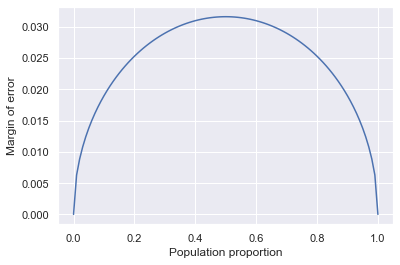

In [13]:
dd = pd.DataFrame({"p": p, "me": me})

sns.set_theme()

sns.lineplot(data=dd, x="p", y="me")
plt.xlabel("Population proportion")
plt.ylabel("Margin of error")
plt.plot()

### Exercise 5 - Describe the relationship between `p` and `me`. Include the margin of error vs. population proportion plot you constructed in your answer. For a given sample size, for which value of `p` is margin of error maximized?

It seems that when the `p` approaches 0.5, we have a maximum margin of error, while if `p` is close to 0 or 1, we have the lowest margin of error. It looks like a bell-shape. If $p = 0.5$ we have the greatest margin of error.

## Success-failure condition

We have emphasized that you must always check conditions before making inference. For inference on proportions, the sample proportion can be assumed to be nearly normal if it is based upon a random sample of independent observations and if both $n \ge 10$ and $n(1−p) \ge 10$. This rule of thumb is easy enough to follow, but it makes you wonder: what’s so special about the number 10?

The short answer is: nothing. You could argue that you would be fine with 9 or that you really should be using $11$. What is the “best” value for such a rule of thumb is, at least to some degree, arbitrary. However, when $np$ and $n(1 − p)$ reaches 10 the sampling distribution is sufficiently normal to use confidence intervals and hypothesis tests that are based on that approximation.

You can investigate the interplay between $n$ and $p$ and the shape of the sampling distribution by using simulations. Play around with the following app to investigate how the shape, center, and spread of the distribution of $\hat{p}$ changes as $n$ and $p$ changes.

### Exercise 6 - Describe the sampling distribution of sample proportions at $n=300$ and $p=0.1$. Be sure to note the center, spread, and shape.

We have $SE = 0.02$. For us, it's a matter of simulating random draws from a normal distribution $N(p,\ SE)$. We get the below results. We get an approximatively normal shape, with center in 0.1 (our $p$) and standard deviation ($SE$) equal to 0.02.

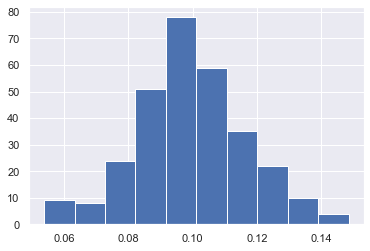

array([0.08983152, 0.13100393, 0.1044506 , 0.10240983, 0.09604632,
       0.09660327, 0.12093793, 0.11859608, 0.10688749, 0.11359093,
       0.1062984 , 0.09648061, 0.11897476, 0.10799885, 0.09941504,
       0.07438161, 0.09268515, 0.08380079, 0.09357719, 0.06559442,
       0.1417355 , 0.08059012, 0.0693415 , 0.09626938, 0.09160157,
       0.1216488 , 0.09505542, 0.10143561, 0.08432164, 0.10085858,
       0.1205745 , 0.12124329, 0.08648882, 0.0982909 , 0.10051547,
       0.09566449, 0.13413256, 0.09669179, 0.10960804, 0.09425732,
       0.10480376, 0.08653617, 0.09550849, 0.1147464 , 0.09982493,
       0.06100015, 0.05382159, 0.09052063, 0.07838041, 0.08315069,
       0.08836398, 0.108457  , 0.12196182, 0.08613082, 0.11436884,
       0.07604273, 0.10233213, 0.08967065, 0.11212385, 0.12202935,
       0.10060631, 0.08039895, 0.09571385, 0.10365812, 0.09590998,
       0.09331974, 0.09918237, 0.08534466, 0.10581887, 0.093687  ,
       0.12867324, 0.09169791, 0.11361864, 0.10761915, 0.08512

In [31]:
def standard_error(p, n):
    return ((p * (1 - p)) / n) ** 0.5

def sampling_distribution(p, n, samp_size=100, plot=True):
    se = standard_error(p, n)
    dist = np.random.normal(loc=p, scale=se, size=samp_size)
    if plot:
        plt.hist(dist)
        plt.show()  
    return dist

sampling_distribution(0.1, 300, 300)